In [1]:
import numpy as np
from sparse_shift import KCD
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
def simulate_data(n, shift=0, scale=1, random_state=None):
    np.random.seed(random_state)
    X11 = np.random.normal(0, 1, (n, 1))
    X12 = X11 + np.random.normal(0, 1, (n, 1))
    y1 = np.ones((n, 1)) * 0
    
    X21 = np.random.normal(0, 1, (n, 1))
    X22 = X21 + np.random.normal(shift, scale, (n, 1))
    y2 = np.ones((n, 1))
    
    return np.block([
        [X11, X12],
        [X21, X22]]
    ), np.vstack((y1, y2)).astype(int).flatten()

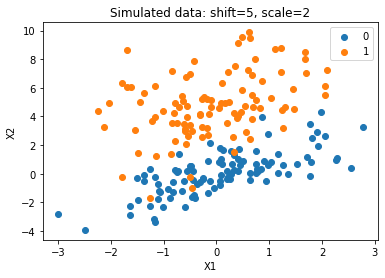

In [3]:
shift = 5
scale = 2
X, y = simulate_data(100, shift=shift, scale=scale)
f, ax = plt.subplots(1, 1)
for y_val in np.unique(y):
    idx = np.where(y == y_val)[0]
    plt.scatter(X[idx, 0], X[idx, 1], label=y_val)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title(f'Simulated data: shift={shift}, scale={scale}')
ax.legend()
plt.show()

In [5]:
ns = np.asarray([20, 50, 100, 200]) // 2
n_reps = 100
n_jobs = -2
n_power_reps = 20
shifts = [0, 0.1, 0.2, 0.5, 1, 2, 5]
scales = [0.1, 0.2, 0.5, 1, 2, 5]

In [6]:
shift_pvals = []
shift_stats = []
scale_pvals = []
scale_stats = []

for shift in shifts:
    print(shift, end='\n')
    for prep in range(n_power_reps):
        print(prep, end=', ')
        for n in ns:
            X, y = simulate_data(n=n, shift=shift, random_state=prep)
            stat, pvalue = KCD(n_jobs=n_jobs).test(
                    X[:, :1], X[:, 1:], y,
                    reps=n_reps)
            shift_pvals.append(pvalue)
            shift_stats.append(stat)
    print('\n')

scale_pvals = []
scale_stats = []
for scale in scales:
    print(scale, end='\n')
    for prep in range(n_power_reps):
        print(prep, end=', ')
        for n in ns:
            X, y = simulate_data(n=n, scale=scale, random_state=prep)
            stat, pvalue = KCD(n_jobs=n_jobs).test(
                    X[:, :1], X[:, 1:], y,
                    reps=n_reps)
            scale_pvals.append(pvalue)
            scale_stats.append(stat)
    print('\n')

0
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

0.1
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

0.2
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

0.5
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

1
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

2
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

5
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

0.1
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

0.2
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

0.5
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

1
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

2
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

5
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,



In [7]:
np.save(
    '../data/03_shift_pvals.npy',
    np.reshape(shift_pvals, (len(shifts), n_power_reps, len(ns))))
np.save(
    '../data/03_shift_stats.npy',
    np.reshape(shift_stats, (len(shifts), n_power_reps, len(ns))))
np.save(
    '../data/03_scale_pvals.npy',
    np.reshape(scale_pvals, (len(scales), n_power_reps, len(ns))))
np.save(
    '../data/03_scale_stats.npy',
    np.reshape(scale_stats, (len(scales), n_power_reps, len(ns))))

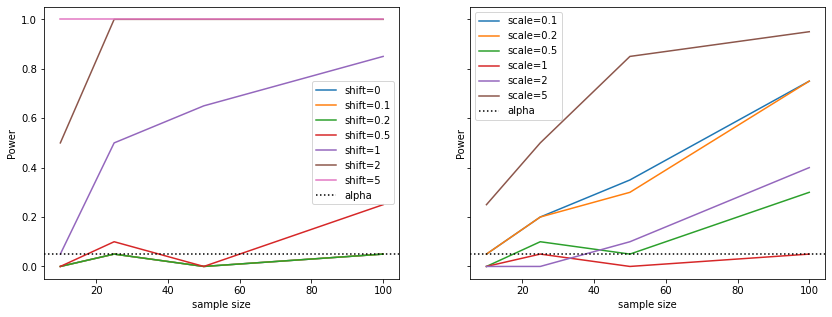

In [8]:
alpha = 0.05
power_plot = np.reshape(shift_pvals, (len(shifts), n_power_reps, len(ns)))
power_plot = (power_plot <= alpha).mean(axis=1)
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

ax = axes[0]
for i, shift in enumerate(shifts):
    ax.plot(np.asarray(ns), power_plot[i], label=f'shift={shift}')
ax.axhline(alpha, c='black', ls=':', label='alpha')
ax.legend()
ax.set_xlabel('sample size')
ax.set_ylabel('Power')

power_plot = np.reshape(scale_pvals, (len(scales), n_power_reps, len(ns)))
power_plot = (power_plot <= alpha).mean(axis=1)
ax = axes[1]
for i, scale in enumerate(scales):
    ax.plot(np.asarray(ns), power_plot[i], label=f'scale={scale}')
ax.axhline(alpha, c='black', ls=':', label='alpha')
ax.legend()
ax.set_xlabel('sample size')
ax.set_ylabel('Power')

plt.show()

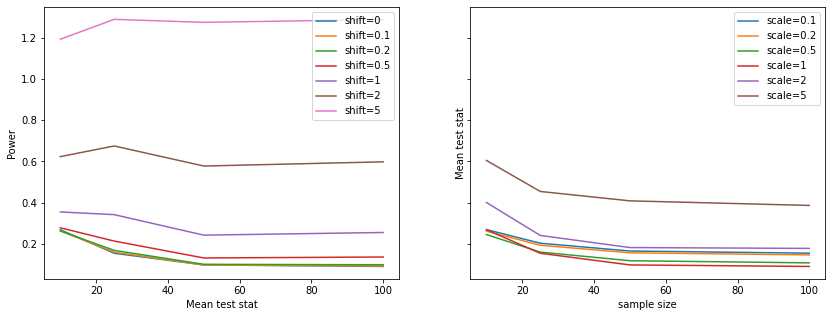

In [9]:
alpha = 0.05
power_plot = np.reshape(shift_stats, (len(shifts), n_power_reps, len(ns)))
power_plot = power_plot.mean(axis=1)
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

ax = axes[0]
for i, shift in enumerate(shifts):
    ax.plot(ns, power_plot[i], label=f'shift={shift}')
ax.legend()
ax.set_xlabel('Mean test stat')
ax.set_ylabel('Power')

power_plot = np.reshape(scale_stats, (len(scales), n_power_reps, len(ns)))
power_plot = power_plot.mean(axis=1)
ax = axes[1]
for i, scale in enumerate(scales):
    ax.plot(ns, power_plot[i], label=f'scale={scale}')
ax.legend()
ax.set_xlabel('sample size')
ax.set_ylabel('Mean test stat')

plt.show()

## Beta distribution

In [67]:
from scipy.stats import beta

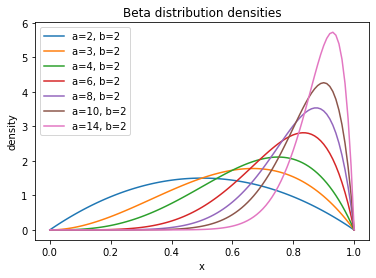

In [150]:
a_list = [2, 3, 4, 6, 8, 10, 14]
b = 2
f, ax = plt.subplots(1, 1)
for a in a_list:
    # b = a/8
    plt.plot(x, beta(a, b).pdf(x), label=f'a={a}, b={b}')
plt.xlabel('x')
ax.set_ylabel('density')
plt.title('Beta distribution densities')
ax.legend()
plt.show()

In [127]:
def simulate_betas(n, a=2, b=2, random_state=None):
    np.random.seed(random_state)
    X11 = np.random.uniform(0, 1, (n, 1))
    X12 = beta(2, 2).pdf(X11) + np.random.normal(0, 1, (n, 1))
    y1 = np.ones((n, 1)) * 0
    
    X21 = np.random.uniform(0, 1, (n, 1))
    X22 = beta(a, b).pdf(X21) + np.random.normal(0, 1, (n, 1))
    y2 = np.ones((n, 1))
    
    return np.block([
        [X11, X12],
        [X21, X22]]
    ), np.vstack((y1, y2)).astype(int).flatten()

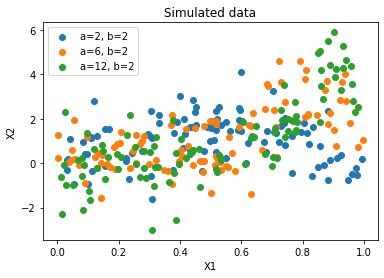

In [135]:
b = 2
a_list = [2, 6, 12]
f, ax = plt.subplots(1, 1)
for a in a_list:
    X, y = simulate_betas(100, a=a, b=b)
    idx = np.where(y == 1)[0]
    plt.scatter(X[idx, 0], X[idx, 1], label=f'a={a}, b={b}')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Simulated data')
ax.legend()
plt.show()

In [132]:
ns = [10, 25, 50, 100, 200]
n_reps = 100
n_jobs = 10
n_power_reps = 20
b = 2
a_list = [2, 4, 6, 8, 10, 12]

beta_pvals = []
beta_stats = []

for a in a_list:
    print(a)
    for prep in range(n_power_reps):
        print(prep, end=' ')
        for n in ns:
            X, y = simulate_betas(n=n, a=a, b=b, random_state=prep)
            kcd = KCD(n_jobs=n_jobs)
            stat, pvalue = kcd.test(
                    X[:, :1], X[:, 1:], y,
                    reps=n_reps)
            beta_pvals.append(pvalue)
            beta_stats.append(stat)
    print('\n')

2
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

4
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

6
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

8
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

10
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

12
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 



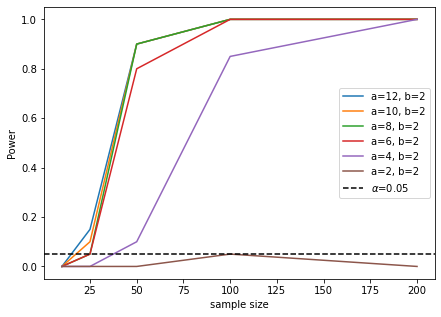

In [148]:
a_list = [2, 4, 6, 8, 10, 12]
alpha = 0.05
power_plot = np.reshape(beta_pvals, (len(a_list), n_power_reps, len(ns)))
power_plot = (power_plot <= alpha).mean(axis=1)
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

ax = axes
for i, a in enumerate(a_list[::-1]):
    ax.plot(ns, power_plot[::-1][i], label=f'a={a}, b={b}')
ax.axhline(alpha, ls='--', c='black', label=r'$\alpha$' + f'={alpha}')
ax.set_xlabel('sample size')
ax.set_ylabel('Power')
ax.legend()
plt.show()

## Power distribution

In [36]:
def simulate_power(n, power=1, random_state=None):
    np.random.seed(random_state)
    X11 = np.random.uniform(0, 1, (n, 1))
    X12 = X11 + np.random.normal(0, 0.2, (n, 1))
    y1 = np.ones((n, 1)) * 0
    
    X21 = np.random.uniform(0, 1, (n, 1))
    X22 = X21**power + np.random.normal(0, 0.2, (n, 1))
    y2 = np.ones((n, 1))
    
    return np.block([
        [X11, X12],
        [X21, X22]]
    ), np.vstack((y1, y2)).astype(int).flatten()

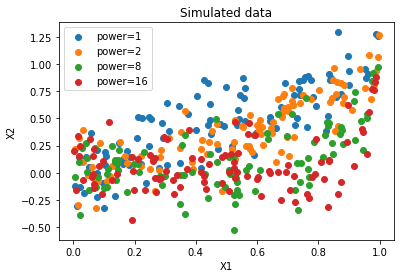

In [37]:
powers = [1, 2, 8, 16]
f, ax = plt.subplots(1, 1)
for power in powers:
    X, y = simulate_power(100, power=power)
    idx = np.where(y == 1)[0]
    plt.scatter(X[idx, 0], X[idx, 1], label=f'power={power}')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Simulated data')
ax.legend()
plt.show()

In [38]:
ns = [20, 50, 100, 200]
n_reps = 100
n_jobs = -2
n_power_reps = 20
powers = [0.25, 0.5, 1, 2, 4, 8]

power_pvals = []
power_stats = []

for power in powers:
    print(power)
    for prep in range(n_power_reps):
        print(prep, end=', ')
        for n in ns:
            X, y = simulate_power(n=n, power=power, random_state=prep)
            kcd = KCDCV(n_jobs=n_jobs)
            stat, pvalue = kcd.test(
                    X[:, :1], X[:, 1:], y,
                    reps=n_reps, fast_pvalue=True)
            power_pvals.append(pvalue)
            power_stats.append(stat)
    print('\n')

0.25
012345678910111213141516171819

0.5
012345678910111213141516171819

1
012345678910111213141516171819

2
012345678910111213141516171819

4
012345678910111213141516171819

8
012345678910111213141516171819



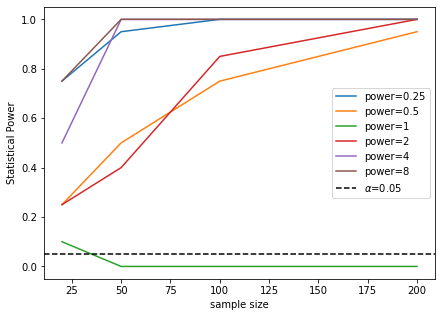

In [39]:
alpha = 0.05
power_plot = np.reshape(power_pvals, (len(powers), n_power_reps, len(ns)))
power_plot = (power_plot <= alpha).mean(axis=1)
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

ax = axes
for i, power in enumerate(powers):
    ax.plot(ns, power_plot[i], label=f'power={power}')
ax.axhline(alpha, ls='--', c='black', label=r'$\alpha$' + f'={alpha}')
ax.set_xlabel('sample size')
ax.set_ylabel('Statistical Power')
ax.legend()
plt.show()

## Sharpness

In [59]:
def peaking(X, alpha, A=0, sigma=1):
    if alpha == 0:
        f = lambda x: A + x*0
    else:
        b = np.log(alpha / (np.exp(alpha) - 1)) + alpha
        f = lambda x: A * np.exp(-alpha*x + b)# integrates to A
    X2 = f(X)
    X2 += np.random.normal(0, sigma, (X.shape[0], 1))

    return X2

def simulate_peaking(n, alpha, random_state=None, auc=1, sigma=1):
    np.random.seed(random_state)
    X11 = np.random.uniform(0, 1, (n, 1))
    X12 = peaking(X11, 0, A=0, sigma=sigma)
    y1 = np.ones(n) * 0
    
    X21 = np.random.uniform(0, 1, (n, 1))
    X22 = peaking(X21, alpha, A=auc, sigma=sigma)
    y2 = np.ones(n)

    X = np.block([
        [X11, X12],
        [X21, X22]]
    )

    y = np.hstack((y1, y2)).astype(int)
    
    return X, y

0, 0.1, 0.3, 0.6, 1, 2,

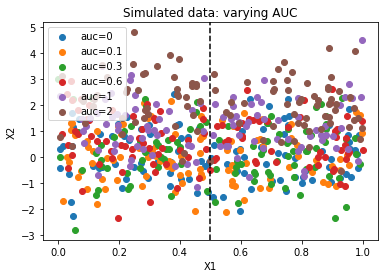

In [60]:
aucs = [0, 0.1, 0.3, 0.6, 1, 2]
power = 0
f, ax = plt.subplots(1, 1)
for auc in aucs:
    print(auc, end=', ')
    X, y = simulate_peaking(100, alpha=power, auc=auc)
    idx = np.where(y == 1)[0]
    plt.scatter(X[idx, 0], X[idx, 1], label=f'auc={auc}')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Simulated data: varying AUC')
ax.legend()
# plt.yscale('symlog')
plt.axvline(0.5, ls='--', c='black')
plt.show()

0, 1, 2, 4, 8,

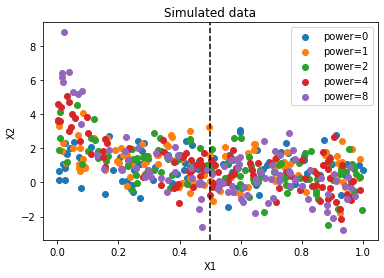

In [63]:
powers = [0, 1, 2, 4, 8]
f, ax = plt.subplots(1, 1)
for power in powers:
    print(power, end=', ')
    X, y = simulate_peaking(100, alpha=power, auc=1)
    idx = np.where(y == 1)[0]
    plt.scatter(X[idx, 0], X[idx, 1], label=f'power={power}')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Simulated data')
ax.legend()
plt.axvline(0.5, ls='--', c='black')
plt.show()

In [102]:
ns = np.asarray([20, 50, 100, 200]) // 2
n_reps = 100
n_jobs = -2
n_power_reps = 20
powers = [0, 1, 2, 4, 8, 16]

power_pvals = []
power_stats = []

for power in powers:
    print(power)
    for prep in range(n_power_reps):
        print(prep, end=', ')
        for n in ns:
            X, y = simulate_peaking(n=n, alpha=power, random_state=prep, auc=0.5)
            kcd = KCD(n_jobs=n_jobs)
            stat, pvalue = kcd.test(
                    X[:, :1], X[:, 1:], y,
                    reps=n_reps)
            power_pvals.append(pvalue)
            power_stats.append(stat)
    print('\n')

0
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

1
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

2
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

4
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

8
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

16
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,



In [104]:
np.save(
    '../data/03_sharpness_pvals.npy',
    np.reshape(power_pvals, (len(powers), n_power_reps, len(ns))))
np.save(
    '../data/03_sharpness_stats.npy',
    np.reshape(power_stats, (len(powers), n_power_reps, len(ns))))

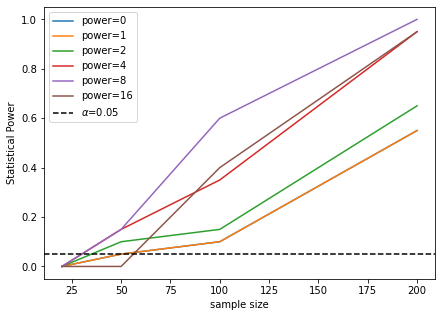

In [103]:
alpha = 0.05
power_plot = np.reshape(power_pvals, (len(powers), n_power_reps, len(ns)))
power_plot = (power_plot <= alpha).mean(axis=1)
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

ax = axes
for i, power in enumerate(powers):
    ax.plot(ns*2, power_plot[i], label=f'power={power}')
ax.axhline(alpha, ls='--', c='black', label=r'$\alpha$' + f'={alpha}')
ax.set_xlabel('sample size')
ax.set_ylabel('Statistical Power')
ax.legend()
plt.show()

In [69]:
ns = [100]
n_reps = 100
n_jobs = -2
n_power_reps = 20
powers = [0, 1, 2, 4, 8]
aucs = [0, 0.1, 0.3, 0.6, 1, 2]
alpha = 0.05

power_mat = np.zeros((len(aucs), len(powers)))

for i, power in enumerate(powers):
    for j, auc in enumerate(aucs):
        print(power, auc)
        pvals = []
        for prep in range(n_power_reps):
            print(prep, end=', ')
            for n in ns:
                X, y = simulate_peaking(n=n, alpha=power, random_state=prep, auc=auc)
                kcd = KCD(n_jobs=n_jobs)
                stat, pvalue = kcd.test(
                        X[:, :1], X[:, 1:], y,
                        reps=n_reps)
                pvals.append(pvalue)

        power_mat[j, i] = (np.asarray(pvals) <= alpha).mean()
        print('\n')

0 0
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

0 0.1
0, 1,2, 3,4,5,6,7, 8,9, 10,11, 12,13, 14,15, 16,17,18,19,

0 0.3
0,1,2, 3,4, 5,6, 7,8,9,10,11,12,13,14,15,16,17,18, 19,

0 0.6
0, 1,2, 3,4, 5,6, 7,8, 9,10, 11,12,13,14,15, 16,17,18,19,

0 1
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

0 2
0,1,2,3,4, 5,6, 7,8, 9,10,11,12,13,14,15,16,17,18,19, 

1 0
0,1,2,3,4, 5,6, 7,8, 9,10,11,12,13,14,15, 16,17,18,19,

1 0.1
0,1,2,3,4,5,6,7,8,9,10,11,12, 13,14,15,16,17,18,19,

1 0.3
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19, 

1 0.6
0,1, 2,3,4, 5,6, 7,8,9,10,11,12, 13,14, 15,16,17,18, 19,

1 1
0,1,2,3,4, 5,6, 7,8, 9,10,11,12,13,14,15,16,17, 18,19, 

1 2
0,1, 2,3, 4,5,6,7, 8,9, 10,11,12,13,14,15,16,17,18,19,

2 0
0,1,2,3,4,5,6,7,8, 9,10,11,12,13,14,15,16,17,18,19, 

2 0.1
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

2 0.3
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

2 0.6
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

2 1
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15

In [101]:
np.save(
    '../data/03_auc_powermat.npy',
    power_mat)

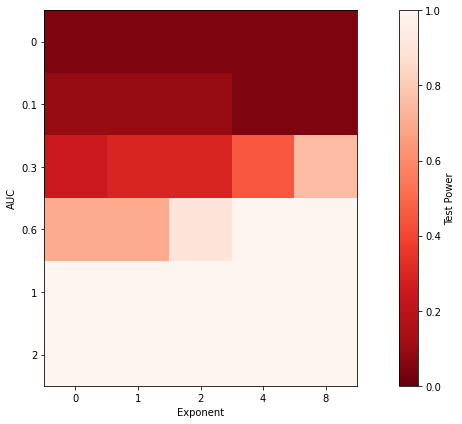

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
img = ax.imshow(power_mat, cmap='Reds_r', vmin=0, vmax=1)
ax.set_xticks(np.arange(len(powers)))
ax.set_xticklabels(powers)
ax.set_yticks(np.arange(len(aucs)))
ax.set_yticklabels(aucs)
ax.set_xlabel('Exponent')
ax.set_ylabel('AUC')
cbar = plt.colorbar(img)
cbar.set_label('Test Power')
plt.tight_layout()
plt.show()